In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import folium
from sklearn.preprocessing import LabelEncoder

In [2]:
train = pd.read_csv('data/train_set.csv')
test = pd.read_csv('data/test_set.csv')

train.rename(columns={ 'pos_adress_lat' : 'pos_address_lat', 
                       'pos_adress_lon' : 'pos_address_lon'}, inplace=True)

D:\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (1,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
D:\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (1,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224734 entries, 0 to 1224733
Data columns (total 18 columns):
amount              1224734 non-null float64
atm_address         269473 non-null object
atm_address_lat     184680 non-null float64
atm_address_lon     184680 non-null float64
city                1224725 non-null object
country             1224734 non-null object
currency            1224690 non-null float64
customer_id         1224734 non-null object
home_add_lat        1224718 non-null float64
home_add_lon        1224718 non-null float64
mcc                 1224734 non-null int64
pos_address         924991 non-null object
pos_address_lat     942614 non-null float64
pos_address_lon     942614 non-null float64
terminal_id         1224705 non-null object
transaction_date    1224690 non-null object
work_add_lat        664660 non-null float64
work_add_lon        664660 non-null float64
dtypes: float64(10), int64(1), object(7)
memory usage: 168.2+ MB


In [3]:
train[:5]

,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,customer_id,home_add_lat,home_add_lon,mcc,pos_address,pos_address_lat,pos_address_lon,terminal_id,transaction_date,work_add_lat,work_add_lon
0,2.884034,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,11606fde0c814ce78e0d726e39a0a5ee,2017-07-15,59.847,30.177
1,2.775633,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,e9647a5e1eacfb06713b6af755ccc595,2017-10-27,59.847,30.177
2,3.708368,NaN,NaN,NaN,St Petersburg,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5992,"PR.MARSHALA ZHUKOVA,31St Petersburg190000 7...",59.858198,30.229024,df06c1fcd3718a514535ae822785f716,2017-10-03,59.847,30.177
3,2.787498,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,6c5e5793ebc984fb72875feffff62854,2017-09-09,59.847,30.177
4,2.892510,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,0576445d74e374c92c0902e612fca356,2017-07-06,59.847,30.177


In [13]:
len(train['terminal_id'].unique())

208384

In [5]:
len(train['customer_id'].unique())

10000

In [6]:
train.loc[train['customer_id'] == train['customer_id'][0]]

,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,customer_id,home_add_lat,home_add_lon,mcc,pos_address,pos_address_lat,pos_address_lon,terminal_id,transaction_date,work_add_lat,work_add_lon
0,2.884034,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,11606fde0c814ce78e0d726e39a0a5ee,2017-07-15,59.847,30.177
1,2.775633,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,e9647a5e1eacfb06713b6af755ccc595,2017-10-27,59.847,30.177
2,3.708368,NaN,NaN,NaN,St Petersburg,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5992,"PR.MARSHALA ZHUKOVA,31St Petersburg190000 7...",59.858198,30.229024,df06c1fcd3718a514535ae822785f716,2017-10-03,59.847,30.177
3,2.787498,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,6c5e5793ebc984fb72875feffff62854,2017-09-09,59.847,30.177
4,2.892510,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,0576445d74e374c92c0902e612fca356,2017-07-06,59.847,30.177
5,2.909018,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,af0d099257ccedbfe730c63a491e0d84,2017-08-23,59.847,30.177
6,2.801228,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,0576445d74e374c92c0902e612fca356,2017-07-29,59.847,30.177
7,2.838200,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,0576445d74e374c92c0902e612fca356,2017-07-15,59.847,30.177
8,3.264740,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,bcb3d58edc38eefade93d916db39b25f,2017-08-18,59.847,30.177
9,3.118792,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,7fa36740d3d66ed86f69f5b3578de264,2017-05-13,59.847,30.177


In [11]:
train['atm_address'].unique()

array([nan, 'R\\MINERALNYE VO\\357202    RUSRUS',
       'YA STR  3\\MOSCOW\\109341    RUSRUS', ...,
       'IY PR-T BLD G\\MOSCOW\\125057    RUSRUS',
       'R MULYAVINA,6\\MINSK        \\220005    BLRBLR',
       'Саратов, ул. Аэропорт, д. 14'], dtype=object)

In [42]:
# Для удобства анализа сделаю labelencoding на customer_id и terminal_id
label_encoder = LabelEncoder()
train['customer_id'] = label_encoder.fit_transform(train['customer_id'])

In [43]:
train['terminal_id'] = train['terminal_id'].fillna(value='0')
label_encoder = LabelEncoder()
train['terminal_id'] = label_encoder.fit_transform(train['terminal_id'])

In [3]:
train.loc[train['customer_id'] == train['customer_id'][0]]

,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,customer_id,home_add_lat,home_add_lon,mcc,pos_address,pos_address_lat,pos_address_lon,terminal_id,transaction_date,work_add_lat,work_add_lon
0,2.884034,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,11606fde0c814ce78e0d726e39a0a5ee,2017-07-15,59.847,30.177
1,2.775633,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,e9647a5e1eacfb06713b6af755ccc595,2017-10-27,59.847,30.177
2,3.708368,NaN,NaN,NaN,St Petersburg,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5992,"PR.MARSHALA ZHUKOVA,31St Petersburg190000 7...",59.858198,30.229024,df06c1fcd3718a514535ae822785f716,2017-10-03,59.847,30.177
3,2.787498,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,6c5e5793ebc984fb72875feffff62854,2017-09-09,59.847,30.177
4,2.892510,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,0576445d74e374c92c0902e612fca356,2017-07-06,59.847,30.177
5,2.909018,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,af0d099257ccedbfe730c63a491e0d84,2017-08-23,59.847,30.177
6,2.801228,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,0576445d74e374c92c0902e612fca356,2017-07-29,59.847,30.177
7,2.838200,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,0576445d74e374c92c0902e612fca356,2017-07-15,59.847,30.177
8,3.264740,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,bcb3d58edc38eefade93d916db39b25f,2017-08-18,59.847,30.177
9,3.118792,NaN,NaN,NaN,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,NaN,59.844072,30.179153,7fa36740d3d66ed86f69f5b3578de264,2017-05-13,59.847,30.177


In [3]:
id1 = train.loc[train['customer_id'] == train['customer_id'][0]]

In [4]:
id1 = id1.fillna(value=0)

In [89]:
id1['atm_address_lat'].index[11]

947887

In [91]:
id1['atm_address_lat'][id1['atm_address_lat'].index[10]]

0.0

In [ ]:
id1['atm_address_lat'][id1['atm_address_lat'].index[i]]
id1['atm_address_lat'][id1['atm_address_lat'].index[i]]

In [110]:
#m = folium.Map(location=[59.851, 30.232], zoom_start=13)
m = folium.Map(location=[59.844, 30.180], zoom_start=16)

for i in range(id1.shape[0]):
    atm_lat = id1['atm_address_lat'][id1['atm_address_lat'].index[i]]
    atm_lon = id1['atm_address_lon'][id1['atm_address_lon'].index[i]]
    pos_lat = id1['pos_address_lat'][id1['pos_address_lat'].index[i]]
    pos_lon = id1['pos_address_lon'][id1['pos_address_lon'].index[i]]
    
    if (atm_lat or atm_lon) != 0: 
        folium.Marker([atm_lat, atm_lon], popup='atm' + str(id1['atm_address_lat'].index[i]), icon=folium.Icon(color='blue', icon='usd')).add_to(m)
    if (pos_lat or pos_lon) != 0:
        folium.Marker([pos_lat, pos_lon], popup='pos' + str(id1['atm_address_lat'].index[i]), icon=folium.Icon(color='orange', icon='shopping-cart')).add_to(m)

    
    
folium.Marker([59.851, 30.232], popup='<i>Home</i>', icon=folium.Icon(color='green', icon='home')).add_to(m)
folium.Marker([59.847, 30.177], popup='<i>Work</i>', icon=folium.Icon(color='red', icon='briefcase')).add_to(m)
folium.Marker([59.844, 30.179], popup='<i>True</i>', icon=folium.Icon(color='red', icon='font')).add_to(m)
folium.Marker([59.85, 30.23], popup='<i>True</i>', icon=folium.Icon(color='red', icon='bold')).add_to(m)
m

In [43]:
a = id1['atm_address_lat'].values
a

array([  0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,  59.86 ,  59.86 ,  59.859,
        59.86 ,  59.86 ,  59.86 ,  59.856,  59.855,  59.861,  59.86 ,
        59.858,   0.   ,  59.849,  59.85 ,  59.862,  59.862,  59.862,
        59.858,  59.858,  59.857,  59.859,  59.858,  59.862,  59.807,
        59.811,  59.809,  60.052,  59.847,  59.848,  59.847,  59.847,
        59.845,  59.843,  59.846,  59.842,  59.846,  59.845,  59.842,
        59.847,  59.844,  59.845,  59.843,  59.842,  59.843,  59.842,
        59.843,  59.846,  59.848,  59.843,  59.841,  59.844,  59.841,
        59.841,  59.843,  59.845,  59.84 ,  59.842,  59.845,   0.   ,
        59.855,  59.848])

In [46]:
b = a[a.nonzero()]
b

array([ 59.86 ,  59.86 ,  59.859,  59.86 ,  59.86 ,  59.86 ,  59.856,
        59.855,  59.861,  59.86 ,  59.858,  59.849,  59.85 ,  59.862,
        59.862,  59.862,  59.858,  59.858,  59.857,  59.859,  59.858,
        59.862,  59.807,  59.811,  59.809,  60.052,  59.847,  59.848,
        59.847,  59.847,  59.845,  59.843,  59.846,  59.842,  59.846,
        59.845,  59.842,  59.847,  59.844,  59.845,  59.843,  59.842,
        59.843,  59.842,  59.843,  59.846,  59.848,  59.843,  59.841,
        59.844,  59.841,  59.841,  59.843,  59.845,  59.84 ,  59.842,
        59.845,  59.855,  59.848])

In [76]:
b1 = b[b<60]

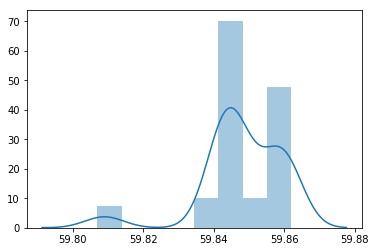

In [77]:
sns.distplot(b1)

In [80]:
b2 = b1[b1>59.82]

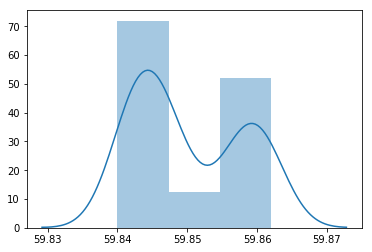

In [81]:
sns.distplot(b2)

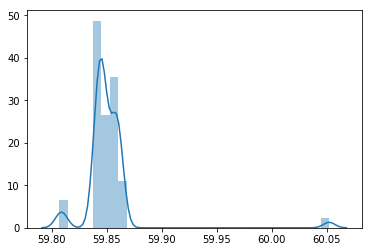

In [45]:
sns.distplot(a[a.nonzero()])

In [48]:
b.mean()

59.851423728813558

In [98]:
a2 = id1['atm_address_lon'].values
a2 = a2[a2.nonzero()]
a2

array([ 30.251,  30.247,  30.245,  30.245,  30.25 ,  30.248,  30.25 ,
        30.249,  30.251,  30.245,  30.246,  30.269,  30.225,  30.232,
        30.229,  30.228,  30.233,  30.23 ,  30.227,  30.227,  30.229,
        30.228,  30.163,  30.16 ,  30.16 ,  30.39 ,  30.181,  30.175,
        30.177,  30.177,  30.179,  30.18 ,  30.178,  30.175,  30.181,
        30.181,  30.178,  30.178,  30.177,  30.178,  30.179,  30.18 ,
        30.179,  30.182,  30.179,  30.18 ,  30.181,  30.176,  30.175,
        30.176,  30.175,  30.177,  30.181,  30.177,  30.175,  30.177,
        30.18 ,  30.264,  30.269])

In [57]:
a2 = a2[a2 < 30.21]
a2

array([ 30.163,  30.16 ,  30.16 ,  30.181,  30.175,  30.177,  30.177,
        30.179,  30.18 ,  30.178,  30.175,  30.181,  30.181,  30.178,
        30.178,  30.177,  30.178,  30.179,  30.18 ,  30.179,  30.182,
        30.179,  30.18 ,  30.181,  30.176,  30.175,  30.176,  30.175,
        30.177,  30.181,  30.177,  30.175,  30.177,  30.18 ])

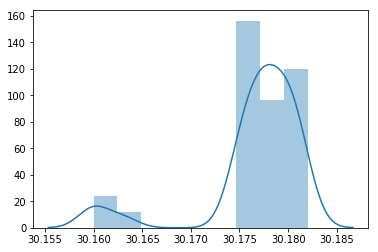

In [58]:
sns.distplot(a2)

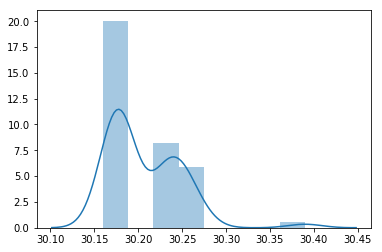

In [51]:
sns.distplot(a2)

In [108]:
a22 = a2[a2>30.2]
a22 = a22[a22<30.3]

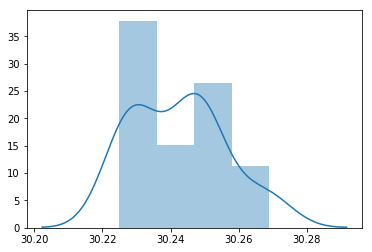

In [109]:
sns.distplot(a22)

In [52]:
a2.mean()

30.207016949152543

In [24]:
m = folium.Map(location=[59.851, 30.232], zoom_start=13)

for i in range(id1.shape[0]):
    atm_lat = id1['atm_address_lat'][id1['atm_address_lat'].index[i]]
    atm_lon = id1['atm_address_lon'][id1['atm_address_lon'].index[i]]
    pos_lat = id1['pos_address_lat'][id1['pos_address_lat'].index[i]]
    pos_lon = id1['pos_address_lon'][id1['pos_address_lon'].index[i]]
    
    if (atm_lat or atm_lon) != 0: 
        pass
        #folium.Marker([atm_lat, atm_lon], popup='atm' + str(id1['atm_address_lat'].index[i]), icon=folium.Icon(color='blue', icon='usd')).add_to(m)
    if (pos_lat or pos_lon) != 0:
        folium.Marker([pos_lat, pos_lon], popup='pos' + str(id1['atm_address_lat'].index[i]), icon=folium.Icon(color='orange', icon='shopping-cart')).add_to(m)

    
    
folium.Marker([59.851, 30.232], popup='<i>Home</i>', icon=folium.Icon(color='green', icon='home')).add_to(m)
folium.Marker([59.847, 30.177], popup='<i>Work</i>', icon=folium.Icon(color='red', icon='briefcase')).add_to(m)
m

In [ ]:
id1[]

In [21]:
m = folium.Map(location=[59.851, 30.232], zoom_start=13)
folium.Marker([59.851, 30.232], popup='<i>Home</i>', icon=folium.Icon(color='green', icon='home')).add_to(m)
folium.Marker([59.847, 30.177], popup='<i>Work</i>', icon=folium.Icon(color='red', icon='briefcase')).add_to(m)
folium.Marker([59.845, 30.2], popup='<i>Home</i>', icon=folium.Icon(color='orange', icon='shopping-cart')).add_to(m)
folium.Marker([59.85, 30.2], popup='Atm', icon=folium.Icon(color='blue', icon='usd')).add_to(m)
m

# Банкоматы

In [5]:
atm_uniq = id1['atm_address'].unique()
atm_uniq

array([0, 'Санкт-Петербург, пр. Стачек, д. 99',
       'Санкт-Петербург, бул. Новаторов, д. 11',
       'Санкт-Петербург, пр. Ленинский, д. 100',
       'Санкт-Петербург, пр. Маршала Жукова, д. 31, корп.1',
       'Санкт-Петербург, ш. Таллинское, д. 159А',
       'Санкт-Петербург, пр. Культуры, д. 47',
       'Санкт-Петербург, ул. Партизана Германа, д. 2'], dtype=object)

In [6]:
atm1 = id1[id1['atm_address'] == atm_uniq[1]]
atm1

,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,customer_id,home_add_lat,home_add_lon,mcc,pos_address,pos_address_lat,pos_address_lon,terminal_id,transaction_date,work_add_lat,work_add_lon
947887,3.694397,"Санкт-Петербург, пр. Стачек, д. 99",59.860,30.251,ST-PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,07573b15ea9100417040a92672e01e31,2017-03-12,59.847,30.177
947888,4.133102,"Санкт-Петербург, пр. Стачек, д. 99",59.860,30.247,ST-PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,07573b15ea9100417040a92672e01e31,2017-08-07,59.847,30.177
947889,3.057675,"Санкт-Петербург, пр. Стачек, д. 99",59.859,30.245,ST-PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,07573b15ea9100417040a92672e01e31,2017-11-19,59.847,30.177
947890,3.620160,"Санкт-Петербург, пр. Стачек, д. 99",59.860,30.245,ST-PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,07573b15ea9100417040a92672e01e31,2017-10-25,59.847,30.177
947891,3.867951,"Санкт-Петербург, пр. Стачек, д. 99",59.860,30.250,ST-PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,07573b15ea9100417040a92672e01e31,2017-10-17,59.847,30.177
947892,4.416207,"Санкт-Петербург, пр. Стачек, д. 99",59.860,30.248,ST-PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,07573b15ea9100417040a92672e01e31,2017-02-03,59.847,30.177
947893,3.948432,"Санкт-Петербург, пр. Стачек, д. 99",59.856,30.250,ST-PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,07573b15ea9100417040a92672e01e31,2017-03-03,59.847,30.177
947894,3.938953,"Санкт-Петербург, пр. Стачек, д. 99",59.855,30.249,ST-PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,07573b15ea9100417040a92672e01e31,2017-04-06,59.847,30.177
947895,3.662942,"Санкт-Петербург, пр. Стачек, д. 99",59.861,30.251,ST-PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,07573b15ea9100417040a92672e01e31,2017-02-27,59.847,30.177
947896,4.621914,"Санкт-Петербург, пр. Стачек, д. 99",59.860,30.245,ST-PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,07573b15ea9100417040a92672e01e31,2017-10-25,59.847,30.177


In [7]:
# Санкт-Петербург, пр. Стачек, д. 99
m = folium.Map(location=[59.858688, 30.247937], zoom_start=16)
folium.Marker([59.858688, 30.247937], popup='<i>True</i>', icon=folium.Icon(color='red', icon='font')).add_to(m)
for i in range(atm1.shape[0]):
    atm_lat = atm1['atm_address_lat'][atm1['atm_address_lat'].index[i]]
    atm_lon = atm1['atm_address_lon'][atm1['atm_address_lon'].index[i]]
    
    if (atm_lat or atm_lon) != 0: 
        folium.Marker([atm_lat, atm_lon], popup='atm' + str(atm1['atm_address_lat'].index[i]), icon=folium.Icon(color='blue', icon='usd')).add_to(m)

m

In [14]:
atm1 = id1[id1['atm_address'] == atm_uniq[2]]
atm1

,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,customer_id,home_add_lat,home_add_lon,mcc,pos_address,pos_address_lat,pos_address_lon,terminal_id,transaction_date,work_add_lat,work_add_lon
965363,4.260764,"Санкт-Петербург, бул. Новаторов, д. 11",59.849,30.269,ST-PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,23681835a18ba371063df14ab98614be,2017-03-21,59.847,30.177
1220661,4.374624,"Санкт-Петербург, бул. Новаторов, д. 11",59.855,30.264,ST-PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,f71fe06857a98c7248fa510962b0a138,2017-10-21,59.847,30.177
1220735,4.158860,"Санкт-Петербург, бул. Новаторов, д. 11",59.848,30.269,ST-PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,f71fe06857a98c7248fa510962b0a138,2017-09-05,59.847,30.177


In [8]:
# Санкт-Петербург, бул. Новаторов, д. 11
m = folium.Map(location=[59.850649, 30.267314], zoom_start=16)
folium.Marker([59.850649, 30.267314], popup='<i>True</i>', icon=folium.Icon(color='red', icon='font')).add_to(m)
for i in range(atm1.shape[0]):
    atm_lat = atm1['atm_address_lat'][atm1['atm_address_lat'].index[i]]
    atm_lon = atm1['atm_address_lon'][atm1['atm_address_lon'].index[i]]
    
    if (atm_lat or atm_lon) != 0: 
        folium.Marker([atm_lat, atm_lon], popup='atm' + str(atm1['atm_address_lat'].index[i]), icon=folium.Icon(color='blue', icon='usd')).add_to(m)

m

In [15]:
atm1 = id1[id1['atm_address'] == atm_uniq[3]]
atm1

,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,customer_id,home_add_lat,home_add_lon,mcc,pos_address,pos_address_lat,pos_address_lon,terminal_id,transaction_date,work_add_lat,work_add_lon
987511,4.081697,"Санкт-Петербург, пр. Ленинский, д. 100",59.85,30.225,ST-PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,4f6e059eab2c67ad73014813d05f64fc,2017-05-19,59.847,30.177


In [11]:
# Санкт-Петербург, пр. Ленинский, д. 100
m = folium.Map(location=[59.853265, 30.220036], zoom_start=16)
folium.Marker([59.853265, 30.220036], popup='<i>True</i>', icon=folium.Icon(color='red', icon='font')).add_to(m)
for i in range(atm1.shape[0]):
    atm_lat = atm1['atm_address_lat'][atm1['atm_address_lat'].index[i]]
    atm_lon = atm1['atm_address_lon'][atm1['atm_address_lon'].index[i]]
    
    if (atm_lat or atm_lon) != 0: 
        folium.Marker([atm_lat, atm_lon], popup='atm' + str(atm1['atm_address_lat'].index[i]), icon=folium.Icon(color='blue', icon='usd')).add_to(m)

m

In [18]:
atm1 = id1[id1['atm_address'] == atm_uniq[4]]
print(atm_uniq[4])
atm1

Санкт-Петербург, пр. Маршала Жукова, д. 31, корп.1


,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,customer_id,home_add_lat,home_add_lon,mcc,pos_address,pos_address_lat,pos_address_lon,terminal_id,transaction_date,work_add_lat,work_add_lon
1005411,3.914050,"Санкт-Петербург, пр. Маршала Жукова, д. 31, ко...",59.862,30.232,ST-PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,710e8d8f8c0e489b069ee71784f54ed1,2017-10-09,59.847,30.177
1005416,3.382170,"Санкт-Петербург, пр. Маршала Жукова, д. 31, ко...",59.862,30.229,ST-PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,710e8d8f8c0e489b069ee71784f54ed1,2017-07-23,59.847,30.177
1005422,3.408833,"Санкт-Петербург, пр. Маршала Жукова, д. 31, ко...",59.862,30.228,ST-PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,710e8d8f8c0e489b069ee71784f54ed1,2017-05-28,59.847,30.177
1005424,3.312841,"Санкт-Петербург, пр. Маршала Жукова, д. 31, ко...",59.858,30.233,ST-PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,710e8d8f8c0e489b069ee71784f54ed1,2017-02-20,59.847,30.177
1005425,3.832169,"Санкт-Петербург, пр. Маршала Жукова, д. 31, ко...",59.858,30.230,ST-PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,710e8d8f8c0e489b069ee71784f54ed1,2017-11-20,59.847,30.177
1005513,4.318061,"Санкт-Петербург, пр. Маршала Жукова, д. 31, ко...",59.857,30.227,ST-PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,710e8d8f8c0e489b069ee71784f54ed1,2017-04-20,59.847,30.177
1005530,3.787486,"Санкт-Петербург, пр. Маршала Жукова, д. 31, ко...",59.859,30.227,ST-PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,710e8d8f8c0e489b069ee71784f54ed1,2017-08-11,59.847,30.177
1005532,3.882287,"Санкт-Петербург, пр. Маршала Жукова, д. 31, ко...",59.858,30.229,ST-PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,710e8d8f8c0e489b069ee71784f54ed1,2017-12-05,59.847,30.177
1005534,2.701457,"Санкт-Петербург, пр. Маршала Жукова, д. 31, ко...",59.862,30.228,ST-PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,710e8d8f8c0e489b069ee71784f54ed1,2017-04-20,59.847,30.177


In [19]:
# Санкт-Петербург, пр. Маршала Жукова, д. 31, корп.1
m = folium.Map(location=[59.858634, 30.228660], zoom_start=16)
folium.Marker([59.858634, 30.228660], popup='<i>True</i>', icon=folium.Icon(color='red', icon='font')).add_to(m)
for i in range(atm1.shape[0]):
    atm_lat = atm1['atm_address_lat'][atm1['atm_address_lat'].index[i]]
    atm_lon = atm1['atm_address_lon'][atm1['atm_address_lon'].index[i]]
    
    if (atm_lat or atm_lon) != 0: 
        folium.Marker([atm_lat, atm_lon], popup='atm' + str(atm1['atm_address_lat'].index[i]), icon=folium.Icon(color='blue', icon='usd')).add_to(m)

m

In [29]:
atm1 = id1[id1['atm_address'] == atm_uniq[5]]
print(atm_uniq[5])
atm1

Санкт-Петербург, ш. Таллинское, д. 159А


,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,customer_id,home_add_lat,home_add_lon,mcc,pos_address,pos_address_lat,pos_address_lon,terminal_id,transaction_date,work_add_lat,work_add_lon
1085766,2.455440,"Санкт-Петербург, ш. Таллинское, д. 159А",59.807,30.163,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,06399d46b6dcc68cb1b6c743fddcccde,2017-11-03,59.847,30.177
1085768,3.470799,"Санкт-Петербург, ш. Таллинское, д. 159А",59.811,30.160,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,06399d46b6dcc68cb1b6c743fddcccde,2017-11-12,59.847,30.177
1085769,3.006574,"Санкт-Петербург, ш. Таллинское, д. 159А",59.809,30.160,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,06399d46b6dcc68cb1b6c743fddcccde,2017-11-03,59.847,30.177


In [30]:
# Санкт-Петербург, ш. Таллинское, д. 159А
m = folium.Map(location=[59.807029, 30.162220], zoom_start=15)
folium.Marker([59.807029, 30.162220], popup='<i>True</i>', icon=folium.Icon(color='red', icon='font')).add_to(m)
for i in range(atm1.shape[0]):
    atm_lat = atm1['atm_address_lat'][atm1['atm_address_lat'].index[i]]
    atm_lon = atm1['atm_address_lon'][atm1['atm_address_lon'].index[i]]
    
    if (atm_lat or atm_lon) != 0: 
        folium.Marker([atm_lat, atm_lon], popup='atm' + str(atm1['atm_address_lat'].index[i]), icon=folium.Icon(color='blue', icon='usd')).add_to(m)

m

In [31]:
atm1 = id1[id1['atm_address'] == atm_uniq[6]]
print(atm_uniq[6])
atm1

Санкт-Петербург, пр. Культуры, д. 47


,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,customer_id,home_add_lat,home_add_lon,mcc,pos_address,pos_address_lat,pos_address_lon,terminal_id,transaction_date,work_add_lat,work_add_lon
1099721,3.171639,"Санкт-Петербург, пр. Культуры, д. 47",60.052,30.39,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,1f63066e6618ce6f90d714ce5c41b104,2017-04-27,59.847,30.177


In [32]:
# Санкт-Петербург, пр. Культуры, д. 47
m = folium.Map(location=[60.055726, 30.389269], zoom_start=15)
folium.Marker([60.055726, 30.389269], popup='<i>True</i>', icon=folium.Icon(color='red', icon='font')).add_to(m)
for i in range(atm1.shape[0]):
    atm_lat = atm1['atm_address_lat'][atm1['atm_address_lat'].index[i]]
    atm_lon = atm1['atm_address_lon'][atm1['atm_address_lon'].index[i]]
    
    if (atm_lat or atm_lon) != 0: 
        folium.Marker([atm_lat, atm_lon], popup='atm' + str(atm1['atm_address_lat'].index[i]), icon=folium.Icon(color='blue', icon='usd')).add_to(m)

m

In [33]:
atm1 = id1[id1['atm_address'] == atm_uniq[7]]
print(atm_uniq[7])
atm1

Санкт-Петербург, ул. Партизана Германа, д. 2


,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,customer_id,home_add_lat,home_add_lon,mcc,pos_address,pos_address_lat,pos_address_lon,terminal_id,transaction_date,work_add_lat,work_add_lon
1146481,3.881644,"Санкт-Петербург, ул. Партизана Германа, д. 2",59.847,30.181,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,700d3a57cf8ef7f1b9b1989129ba4a15,2017-08-05,59.847,30.177
1146482,3.858952,"Санкт-Петербург, ул. Партизана Германа, д. 2",59.848,30.175,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,700d3a57cf8ef7f1b9b1989129ba4a15,2017-06-21,59.847,30.177
1146483,4.127720,"Санкт-Петербург, ул. Партизана Германа, д. 2",59.847,30.177,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,700d3a57cf8ef7f1b9b1989129ba4a15,2017-03-09,59.847,30.177
1146485,3.942646,"Санкт-Петербург, ул. Партизана Германа, д. 2",59.847,30.177,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,700d3a57cf8ef7f1b9b1989129ba4a15,2017-07-08,59.847,30.177
1146486,3.877625,"Санкт-Петербург, ул. Партизана Германа, д. 2",59.845,30.179,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,700d3a57cf8ef7f1b9b1989129ba4a15,2017-07-13,59.847,30.177
1146487,3.645830,"Санкт-Петербург, ул. Партизана Германа, д. 2",59.843,30.180,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,700d3a57cf8ef7f1b9b1989129ba4a15,2017-10-14,59.847,30.177
1146488,3.389771,"Санкт-Петербург, ул. Партизана Германа, д. 2",59.846,30.178,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,700d3a57cf8ef7f1b9b1989129ba4a15,2017-08-18,59.847,30.177
1146491,3.528406,"Санкт-Петербург, ул. Партизана Германа, д. 2",59.842,30.175,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,700d3a57cf8ef7f1b9b1989129ba4a15,2017-06-05,59.847,30.177
1146492,3.462820,"Санкт-Петербург, ул. Партизана Германа, д. 2",59.846,30.181,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,700d3a57cf8ef7f1b9b1989129ba4a15,2017-06-24,59.847,30.177
1146499,3.886977,"Санкт-Петербург, ул. Партизана Германа, д. 2",59.845,30.181,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,700d3a57cf8ef7f1b9b1989129ba4a15,2017-03-14,59.847,30.177


In [34]:
# Санкт-Петербург, ул. Партизана Германа, д. 2
m = folium.Map(location=[59.843525, 30.179657], zoom_start=15)
folium.Marker([59.843525, 30.179657], popup='<i>True</i>', icon=folium.Icon(color='red', icon='font')).add_to(m)
for i in range(atm1.shape[0]):
    atm_lat = atm1['atm_address_lat'][atm1['atm_address_lat'].index[i]]
    atm_lon = atm1['atm_address_lon'][atm1['atm_address_lon'].index[i]]
    
    if (atm_lat or atm_lon) != 0: 
        folium.Marker([atm_lat, atm_lon], popup='atm' + str(atm1['atm_address_lat'].index[i]), icon=folium.Icon(color='blue', icon='usd')).add_to(m)

m

In [127]:
atm1['atm_address_lat'].values

array([ 59.86 ,  59.86 ,  59.859,  59.86 ,  59.86 ,  59.86 ,  59.856,
        59.855,  59.861,  59.86 ,  59.858])

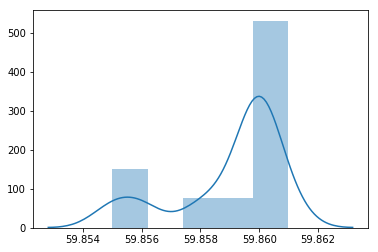

In [128]:
sns.distplot(atm1['atm_address_lat'].values)

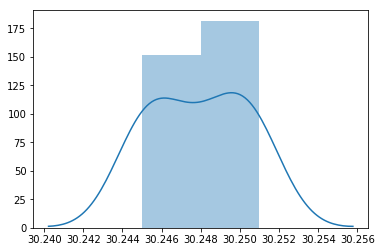

In [129]:
sns.distplot(atm1['atm_address_lon'].values)

In [ ]:
#m = folium.Map(location=[59.851, 30.232], zoom_start=13)
m = folium.Map(location=[59.844, 30.180], zoom_start=16)

for i in range(id1.shape[0]):
    atm_lat = id1['atm_address_lat'][id1['atm_address_lat'].index[i]]
    atm_lon = id1['atm_address_lon'][id1['atm_address_lon'].index[i]]
    pos_lat = id1['pos_address_lat'][id1['pos_address_lat'].index[i]]
    pos_lon = id1['pos_address_lon'][id1['pos_address_lon'].index[i]]
    
    if (atm_lat or atm_lon) != 0: 
        folium.Marker([atm_lat, atm_lon], popup='atm' + str(id1['atm_address_lat'].index[i]), icon=folium.Icon(color='blue', icon='usd')).add_to(m)
    if (pos_lat or pos_lon) != 0:
        folium.Marker([pos_lat, pos_lon], popup='pos' + str(id1['atm_address_lat'].index[i]), icon=folium.Icon(color='orange', icon='shopping-cart')).add_to(m)

    
    
folium.Marker([59.851, 30.232], popup='<i>Home</i>', icon=folium.Icon(color='green', icon='home')).add_to(m)
folium.Marker([59.847, 30.177], popup='<i>Work</i>', icon=folium.Icon(color='red', icon='briefcase')).add_to(m)
folium.Marker([59.844, 30.179], popup='<i>True</i>', icon=folium.Icon(color='red', icon='font')).add_to(m)
folium.Marker([59.85, 30.23], popup='<i>True</i>', icon=folium.Icon(color='red', icon='bold')).add_to(m)
m

# Терминалы

In [41]:
pos_uniq = id1['pos_address'].unique()
print(len(pos_uniq))
print(pos_uniq)

3
[0 'PR.MARSHALA ZHUKOVA,31St Petersburg190000    78 RUS'
 '2 PARTIZANA GERMANA STRSANKT-PETERBU190000    RUSRUS']


In [48]:
pos = id1[id1['pos_address'] == pos_uniq[1]]
print(pos_uniq[1])
pos

PR.MARSHALA ZHUKOVA,31St Petersburg190000    78 RUS


,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,customer_id,home_add_lat,home_add_lon,mcc,pos_address,pos_address_lat,pos_address_lon,terminal_id,transaction_date,work_add_lat,work_add_lon
2,3.708368,0,0.0,0.0,St Petersburg,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5992,"PR.MARSHALA ZHUKOVA,31St Petersburg190000 7...",59.858198,30.229024,df06c1fcd3718a514535ae822785f716,2017-10-03,59.847,30.177


In [50]:
# PR.MARSHALA ZHUKOVA,31
m = folium.Map(location=[59.858634, 30.228660], zoom_start=15)
folium.Marker([59.858634, 30.228660], popup='<i>True</i>', icon=folium.Icon(color='red', icon='font')).add_to(m)
for i in range(pos.shape[0]):
    pos_lat = pos['pos_address_lat'][pos['pos_address_lat'].index[i]]
    pos_lon = pos['pos_address_lon'][pos['pos_address_lon'].index[i]]
    
    if (atm_lat or atm_lon) != 0: 
        folium.Marker([pos_lat, pos_lon], popup='pos' + str(pos['pos_address_lat'].index[i]), icon=folium.Icon(color='blue', icon='usd')).add_to(m)

m

In [51]:
pos = id1[id1['pos_address'] == pos_uniq[2]]
print(pos_uniq[2])
pos

2 PARTIZANA GERMANA STRSANKT-PETERBU190000    RUSRUS


,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,customer_id,home_add_lat,home_add_lon,mcc,pos_address,pos_address_lat,pos_address_lon,terminal_id,transaction_date,work_add_lat,work_add_lon
10,3.109393,0,0.0,0.0,SANKT-PETERBU,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5411,2 PARTIZANA GERMANA STRSANKT-PETERBU190000 ...,59.844072,30.179153,db6ce42a72e5fa3ec91dc2c883e265e3,2017-10-03,59.847,30.177


In [52]:
# 2 PARTIZANA GERMANA
m = folium.Map(location=[59.843525, 30.179657], zoom_start=15)
folium.Marker([59.843525, 30.179657], popup='<i>True</i>', icon=folium.Icon(color='red', icon='font')).add_to(m)
for i in range(pos.shape[0]):
    pos_lat = pos['pos_address_lat'][pos['pos_address_lat'].index[i]]
    pos_lon = pos['pos_address_lon'][pos['pos_address_lon'].index[i]]
    
    if (atm_lat or atm_lon) != 0: 
        folium.Marker([pos_lat, pos_lon], popup='pos' + str(pos['pos_address_lat'].index[i]), icon=folium.Icon(color='blue', icon='usd')).add_to(m)

m

# Общая картина

In [56]:
m = folium.Map(location=[59.851, 30.232], zoom_start=12)
folium.Marker([59.858688, 30.247937], popup='<i>a1</i>', icon=folium.Icon(color='blue', icon='usd')).add_to(m)
folium.Marker([59.850649, 30.267314], popup='<i>a2</i>', icon=folium.Icon(color='blue', icon='usd')).add_to(m)
folium.Marker([59.853265, 30.220036], popup='<i>a3</i>', icon=folium.Icon(color='blue', icon='usd')).add_to(m)
folium.Marker([59.858634, 30.228660], popup='<i>a4</i>', icon=folium.Icon(color='blue', icon='usd')).add_to(m)
folium.Marker([59.807029, 30.162220], popup='<i>a5</i>', icon=folium.Icon(color='blue', icon='usd')).add_to(m)
folium.Marker([60.055726, 30.389269], popup='<i>a6</i>', icon=folium.Icon(color='blue', icon='usd')).add_to(m)
folium.Marker([59.843525, 30.179657], popup='<i>a7</i>', icon=folium.Icon(color='blue', icon='usd')).add_to(m)


folium.Marker([59.858634, 30.228660], popup='<i>t1</i>', icon=folium.Icon(color='orange', icon='shopping-cart')).add_to(m)
folium.Marker([59.843525, 30.179657], popup='<i>t2</i>', icon=folium.Icon(color='orange', icon='shopping-cart')).add_to(m)


folium.Marker([59.851, 30.232], popup='<i>Home</i>', icon=folium.Icon(color='green', icon='home')).add_to(m)
folium.Marker([59.847, 30.177], popup='<i>Work</i>', icon=folium.Icon(color='red', icon='briefcase')).add_to(m)
m

In [68]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()

In [69]:
location = geolocator.geocode("175 5th Avenue NYC")

In [70]:
print(location.address)

Flatiron Building, 175, 5th Avenue, Flatiron Building, Manhattan Community Board 5, New York County, NYC, New York, 10010, United States of America


In [71]:
print((location.latitude, location.longitude))

(40.7410861, -73.9896298241625)


In [72]:
print(location.raw)

{'place_id': '133351612', 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://www.openstreetmap.org/copyright', 'osm_type': 'way', 'osm_id': '264768896', 'boundingbox': ['40.7407597', '40.7413004', '-73.9898715', '-73.9895014'], 'lat': '40.7410861', 'lon': '-73.9896298241625', 'display_name': 'Flatiron Building, 175, 5th Avenue, Flatiron Building, Manhattan Community Board 5, New York County, NYC, New York, 10010, United States of America', 'class': 'tourism', 'type': 'attraction', 'importance': 0.51325082888049, 'icon': 'https://nominatim.openstreetmap.org/images/mapicons/poi_point_of_interest.p.20.png'}


In [87]:
from geopy.geocoders import Yandex

In [88]:
geolocator = Yandex()

In [97]:
location = geolocator.reverse("52.509669, 13.376294")

In [98]:
location

[Location(Берлин, Германия, (52.503187, 13.365773, 0.0)),
 Location(Германия, (52.517481, 13.406888, 0.0)),
 Location(Германия, (52.506574, 13.39698, 0.0)),
 Location(Германия, (52.506574, 13.39698, 0.0)),
 Location(Германия, (52.517826, 13.401714, 0.0)),
 Location(Германия, (52.459041, 13.457643, 0.0)),
 Location(None, (51.228764, 10.551692, 0.0))]

In [106]:
location[0]

'Москва, Россия'

In [108]:
location = geolocator.geocode("2 PARTIZANA GERMANA")

In [109]:
location

Location(Санкт-Петербург, Россия, (59.843525, 30.179657, 0.0))

In [110]:
print(location.address)

Санкт-Петербург, Россия


In [111]:
print(location.raw)

{'metaDataProperty': {'GeocoderMetaData': {'kind': 'house', 'text': 'Россия, Санкт-Петербург, улица Партизана Германа, 2', 'precision': 'exact', 'Address': {'country_code': 'RU', 'postal_code': '198205', 'formatted': 'Санкт-Петербург, улица Партизана Германа, 2', 'Components': [{'kind': 'country', 'name': 'Россия'}, {'kind': 'province', 'name': 'Северо-Западный федеральный округ'}, {'kind': 'province', 'name': 'Санкт-Петербург'}, {'kind': 'locality', 'name': 'Санкт-Петербург'}, {'kind': 'street', 'name': 'улица Партизана Германа'}, {'kind': 'house', 'name': '2'}]}, 'AddressDetails': {'Country': {'AddressLine': 'Санкт-Петербург, улица Партизана Германа, 2', 'CountryNameCode': 'RU', 'CountryName': 'Россия', 'AdministrativeArea': {'AdministrativeAreaName': 'Санкт-Петербург', 'Locality': {'LocalityName': 'Санкт-Петербург', 'Thoroughfare': {'ThoroughfareName': 'улица Партизана Германа', 'Premise': {'PremiseNumber': '2', 'PostalCode': {'PostalCodeNumber': '198205'}}}}}}}}}, 'description': 'С

In [112]:
print(location.latitude, location.longitude)

59.843525 30.179657


In [81]:
from geopy.distance import vincenty
newport_ri = (41.49008, -71.312796)
cleveland_oh = (41.499498, -81.695391)
print(vincenty(newport_ri, cleveland_oh).km)

866.4554329011002


транзакции, где нет адреса, только координаты

In [114]:
id1

,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,customer_id,home_add_lat,home_add_lon,mcc,pos_address,pos_address_lat,pos_address_lon,terminal_id,transaction_date,work_add_lat,work_add_lon
0,2.884034,0,0.000,0.000,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,0,59.844072,30.179153,11606fde0c814ce78e0d726e39a0a5ee,2017-07-15,59.847,30.177
1,2.775633,0,0.000,0.000,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,0,59.844072,30.179153,e9647a5e1eacfb06713b6af755ccc595,2017-10-27,59.847,30.177
2,3.708368,0,0.000,0.000,St Petersburg,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5992,"PR.MARSHALA ZHUKOVA,31St Petersburg190000 7...",59.858198,30.229024,df06c1fcd3718a514535ae822785f716,2017-10-03,59.847,30.177
3,2.787498,0,0.000,0.000,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,0,59.844072,30.179153,6c5e5793ebc984fb72875feffff62854,2017-09-09,59.847,30.177
4,2.892510,0,0.000,0.000,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,0,59.844072,30.179153,0576445d74e374c92c0902e612fca356,2017-07-06,59.847,30.177
5,2.909018,0,0.000,0.000,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,0,59.844072,30.179153,af0d099257ccedbfe730c63a491e0d84,2017-08-23,59.847,30.177
6,2.801228,0,0.000,0.000,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,0,59.844072,30.179153,0576445d74e374c92c0902e612fca356,2017-07-29,59.847,30.177
7,2.838200,0,0.000,0.000,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,0,59.844072,30.179153,0576445d74e374c92c0902e612fca356,2017-07-15,59.847,30.177
8,3.264740,0,0.000,0.000,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,0,59.844072,30.179153,bcb3d58edc38eefade93d916db39b25f,2017-08-18,59.847,30.177
9,3.118792,0,0.000,0.000,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,0,59.844072,30.179153,7fa36740d3d66ed86f69f5b3578de264,2017-05-13,59.847,30.177


In [115]:
id1[id1['atm_address']==0]

,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,customer_id,home_add_lat,home_add_lon,mcc,pos_address,pos_address_lat,pos_address_lon,terminal_id,transaction_date,work_add_lat,work_add_lon
0,2.884034,0,0.0,0.0,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,0,59.844072,30.179153,11606fde0c814ce78e0d726e39a0a5ee,2017-07-15,59.847,30.177
1,2.775633,0,0.0,0.0,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,0,59.844072,30.179153,e9647a5e1eacfb06713b6af755ccc595,2017-10-27,59.847,30.177
2,3.708368,0,0.0,0.0,St Petersburg,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5992,"PR.MARSHALA ZHUKOVA,31St Petersburg190000 7...",59.858198,30.229024,df06c1fcd3718a514535ae822785f716,2017-10-03,59.847,30.177
3,2.787498,0,0.0,0.0,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,0,59.844072,30.179153,6c5e5793ebc984fb72875feffff62854,2017-09-09,59.847,30.177
4,2.892510,0,0.0,0.0,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,0,59.844072,30.179153,0576445d74e374c92c0902e612fca356,2017-07-06,59.847,30.177
5,2.909018,0,0.0,0.0,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,0,59.844072,30.179153,af0d099257ccedbfe730c63a491e0d84,2017-08-23,59.847,30.177
6,2.801228,0,0.0,0.0,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,0,59.844072,30.179153,0576445d74e374c92c0902e612fca356,2017-07-29,59.847,30.177
7,2.838200,0,0.0,0.0,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,0,59.844072,30.179153,0576445d74e374c92c0902e612fca356,2017-07-15,59.847,30.177
8,3.264740,0,0.0,0.0,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,0,59.844072,30.179153,bcb3d58edc38eefade93d916db39b25f,2017-08-18,59.847,30.177
9,3.118792,0,0.0,0.0,ST PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,5261,0,59.844072,30.179153,7fa36740d3d66ed86f69f5b3578de264,2017-05-13,59.847,30.177


In [117]:
id1[id1['pos_address_lat']==0]

,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,customer_id,home_add_lat,home_add_lon,mcc,pos_address,pos_address_lat,pos_address_lon,terminal_id,transaction_date,work_add_lat,work_add_lon
947887,3.694397,"Санкт-Петербург, пр. Стачек, д. 99",59.860,30.251,ST-PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,07573b15ea9100417040a92672e01e31,2017-03-12,59.847,30.177
947888,4.133102,"Санкт-Петербург, пр. Стачек, д. 99",59.860,30.247,ST-PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,07573b15ea9100417040a92672e01e31,2017-08-07,59.847,30.177
947889,3.057675,"Санкт-Петербург, пр. Стачек, д. 99",59.859,30.245,ST-PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,07573b15ea9100417040a92672e01e31,2017-11-19,59.847,30.177
947890,3.620160,"Санкт-Петербург, пр. Стачек, д. 99",59.860,30.245,ST-PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,07573b15ea9100417040a92672e01e31,2017-10-25,59.847,30.177
947891,3.867951,"Санкт-Петербург, пр. Стачек, д. 99",59.860,30.250,ST-PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,07573b15ea9100417040a92672e01e31,2017-10-17,59.847,30.177
947892,4.416207,"Санкт-Петербург, пр. Стачек, д. 99",59.860,30.248,ST-PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,07573b15ea9100417040a92672e01e31,2017-02-03,59.847,30.177
947893,3.948432,"Санкт-Петербург, пр. Стачек, д. 99",59.856,30.250,ST-PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,07573b15ea9100417040a92672e01e31,2017-03-03,59.847,30.177
947894,3.938953,"Санкт-Петербург, пр. Стачек, д. 99",59.855,30.249,ST-PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,07573b15ea9100417040a92672e01e31,2017-04-06,59.847,30.177
947895,3.662942,"Санкт-Петербург, пр. Стачек, д. 99",59.861,30.251,ST-PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,07573b15ea9100417040a92672e01e31,2017-02-27,59.847,30.177
947896,4.621914,"Санкт-Петербург, пр. Стачек, д. 99",59.860,30.245,ST-PETERSBURG,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,07573b15ea9100417040a92672e01e31,2017-10-25,59.847,30.177


In [125]:
id1[(id1['atm_address']==0) & (id1['pos_address_lat']==0)]

,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,customer_id,home_add_lat,home_add_lon,mcc,pos_address,pos_address_lat,pos_address_lon,terminal_id,transaction_date,work_add_lat,work_add_lon
959457,2.702098,0,0.0,0.0,SANKT-PETERBU,RU,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,1a620eee86376b483e5c750fe17f12a2,2017-04-20,59.847,30.177
1184205,3.479419,0,0.0,0.0,SANKT-PETERBU,RU,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,b3dfb73f1f2cc4a8d16b95a35f1753c2,2017-02-09,59.847,30.177


In [127]:
id1[id1['terminal_id'] == '1a620eee86376b483e5c750fe17f12a2']

,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,customer_id,home_add_lat,home_add_lon,mcc,pos_address,pos_address_lat,pos_address_lon,terminal_id,transaction_date,work_add_lat,work_add_lon
959457,2.702098,0,0.0,0.0,SANKT-PETERBU,RU,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,1a620eee86376b483e5c750fe17f12a2,2017-04-20,59.847,30.177


In [128]:
id1[id1['terminal_id'] == 'b3dfb73f1f2cc4a8d16b95a35f1753c2']

,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,customer_id,home_add_lat,home_add_lon,mcc,pos_address,pos_address_lat,pos_address_lon,terminal_id,transaction_date,work_add_lat,work_add_lon
1184205,3.479419,0,0.0,0.0,SANKT-PETERBU,RU,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,0,0.0,0.0,b3dfb73f1f2cc4a8d16b95a35f1753c2,2017-02-09,59.847,30.177


In [132]:
train[train['terminal_id']=='1a620eee86376b483e5c750fe17f12a2']

,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,customer_id,home_add_lat,home_add_lon,mcc,pos_address,pos_address_lat,pos_address_lon,terminal_id,transaction_date,work_add_lat,work_add_lon
959457,2.702098,NaN,NaN,NaN,SANKT-PETERBU,RU,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,NaN,NaN,NaN,1a620eee86376b483e5c750fe17f12a2,2017-04-20,59.847,30.177


In [133]:
train[train['terminal_id']=='b3dfb73f1f2cc4a8d16b95a35f1753c2']

,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,customer_id,home_add_lat,home_add_lon,mcc,pos_address,pos_address_lat,pos_address_lon,terminal_id,transaction_date,work_add_lat,work_add_lon
1184203,3.302671,LYUTOVA STR BL\SANKT-PETERBU\198206 RUSRUS,NaN,NaN,SANKT-PETERBU,RUS,643.0,f7b0da8b9c94dae23f92895bfe7c8ce5,59.833,30.153,6011,NaN,NaN,NaN,b3dfb73f1f2cc4a8d16b95a35f1753c2,2017-03-20,NaN,NaN
1184204,2.986162,LYUTOVA STR BL\SANKT-PETERBU\198206 RUSRUS,NaN,NaN,SANKT-PETERBU,RUS,643.0,f7b0da8b9c94dae23f92895bfe7c8ce5,59.833,30.153,6011,NaN,NaN,NaN,b3dfb73f1f2cc4a8d16b95a35f1753c2,2017-02-03,NaN,NaN
1184205,3.479419,NaN,NaN,NaN,SANKT-PETERBU,RU,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,6011,NaN,NaN,NaN,b3dfb73f1f2cc4a8d16b95a35f1753c2,2017-02-09,59.847,30.177
1184206,3.697421,LYUTOVA STR BL\SANKT-PETERBU\198206 RUSRUS,NaN,NaN,SANKT-PETERBU,RUS,643.0,f7b0da8b9c94dae23f92895bfe7c8ce5,59.833,30.153,6011,NaN,NaN,NaN,b3dfb73f1f2cc4a8d16b95a35f1753c2,2017-04-05,NaN,NaN
1184207,3.460365,LYUTOVA STR BL\SANKT-PETERBU\198206 RUSRUS,NaN,NaN,SANKT-PETERBU,RUS,643.0,f7b0da8b9c94dae23f92895bfe7c8ce5,59.833,30.153,6011,NaN,NaN,NaN,b3dfb73f1f2cc4a8d16b95a35f1753c2,2017-04-05,NaN,NaN
1184208,2.310502,LYUTOVA STR BL\SANKT-PETERBU\198206 RUSRUS,NaN,NaN,SANKT-PETERBU,RUS,643.0,f7b0da8b9c94dae23f92895bfe7c8ce5,59.833,30.153,6011,NaN,NaN,NaN,b3dfb73f1f2cc4a8d16b95a35f1753c2,2017-09-05,NaN,NaN
